In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
# 2000년 이후의 다우존스 지수 데이터를 야후 파이넨스로 부터 다운로드 한다. 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
# 2000년 이후의 KOSPI 데이터를 야후 파이넨스로 부터 다운로드 한다. 
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))

<Figure size 648x360 with 0 Axes>

<Figure size 648x360 with 0 Axes>

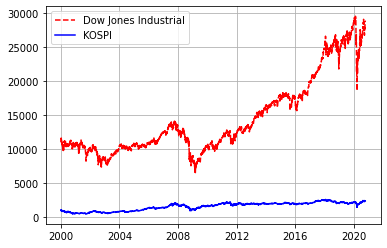

In [4]:
# 다우존스 지수를 붉은 점선으로 출력한다. 
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
# KOSPI를 푸른 실선으로 출력한다. 
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [5]:
# 지수화 비교 (Indexation)

# 금일 다우존스 지수를 2000년 1월 4일 다우존스 지수로 나눈 뒤 100을 곱한다. 
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100 

# 금일 KOSPI 지수를 2000년 1월 4일 KOSPI 지수로 나눈 뒤 100을 곱한다. 
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

print(d)
print(k)

Date
2000-01-04    100.000000
2000-01-05    101.134038
2000-01-06    102.321619
2000-01-07    104.770260
2000-01-10    105.221624
                 ...    
2020-10-07    257.352627
2020-10-08    258.462370
2020-10-09    259.929834
2020-10-12    262.208619
2020-10-13    260.774631
Name: Close, Length: 5228, dtype: float64
Date
2000-01-04    100.000000
2000-01-05     93.132456
2000-01-06     90.722725
2000-01-07     89.576408
2000-01-10     93.220271
                 ...    
2020-10-07    225.387129
2020-10-08    225.861145
2020-10-12    226.972531
2020-10-13    226.917757
2020-10-14    225.976341
Name: Close, Length: 5115, dtype: float64


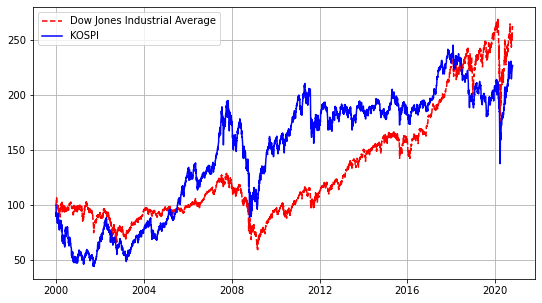

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label="Dow Jones Industrial Average")
plt.plot(k.index, k, 'b', label="KOSPI")
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [7]:
# 산점도(Scatter Plot) 분석; 산점도란 독립변수 x와 종속변수 y의 상관 관계를 확인 할 때 쓰는 그래프다. 

# 다우존스 지수 데이터 개수와 KOSPI 지수 데이터 개수를 len() 함수로 출력해 보면 데이터 개수가 다르다. 
print(len(dow))
print(len(kospi))

5228
5115


ValueError: x and y must be the same size

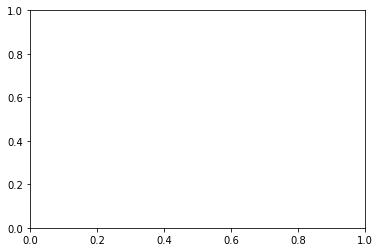

In [8]:
# 산점도를 그리려면 x, y의 사이즈가 동일해야 한다. 지금 이대로는 오류가 발생
plt.scatter(dow, kospi, marker='.')

In [9]:
import pandas as pd

# 다우존스 지수가 종가 칼럼과 KOSPI 지수의 종가 칼럼을 합쳐서 데이터프레임 df를 생성하자. 한 쪽에 데이터가 없으면 값이 없다는 의미의 NaN으로 자동적으로 채워주기 때문에 전체 대이터 개수가 둘 다 늘어난다.
df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
print(df)


                     DOW        KOSPI
Date                                 
2000-01-04  10997.929688  1059.040039
2000-01-05  11122.650391   986.309998
2000-01-06  11253.259766   960.789978
2000-01-07  11522.559570   948.650024
2000-01-10  11572.200195   987.239990
...                  ...          ...
2020-10-08  28425.509766  2391.959961
2020-10-09  28586.900391          NaN
2020-10-12  28837.519531  2403.729980
2020-10-13  28679.810547  2403.149902
2020-10-14           NaN  2393.179932

[5385 rows x 2 columns]


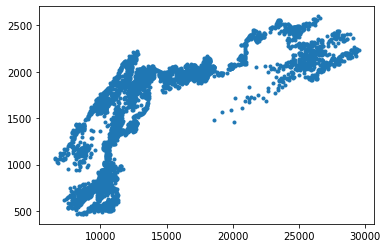

In [10]:
plt.scatter(df['DOW'], df['KOSPI'], marker='.')

In [11]:
# fillna() 함수를 사용하여 NaN을 채울 수 있는데, 인수로 bfill(backward fill)을 주면 NaN 뒤에 있는 값으로 NaN을 덮어쓴다. 
df = df.fillna(method='bfill')
print(df)

                     DOW        KOSPI
Date                                 
2000-01-04  10997.929688  1059.040039
2000-01-05  11122.650391   986.309998
2000-01-06  11253.259766   960.789978
2000-01-07  11522.559570   948.650024
2000-01-10  11572.200195   987.239990
...                  ...          ...
2020-10-08  28425.509766  2391.959961
2020-10-09  28586.900391  2403.729980
2020-10-12  28837.519531  2403.729980
2020-10-13  28679.810547  2403.149902
2020-10-14           NaN  2393.179932

[5385 rows x 2 columns]


In [12]:
# 데이터 프레임의 마지막 행에 NaN이 있으면 bfill 방식으로는 모든 NaN을 없앨 수 없다. 그럴 때는 ffill(forward fill) 방식으로 fillna() 함수를 한번 더 호출함으로써 제일 마지막 행의 이전 행에 있던 값으로 NaN을 덮어 쓸수 있다. 
df = df.fillna(method='ffill')
print(df)

                     DOW        KOSPI
Date                                 
2000-01-04  10997.929688  1059.040039
2000-01-05  11122.650391   986.309998
2000-01-06  11253.259766   960.789978
2000-01-07  11522.559570   948.650024
2000-01-10  11572.200195   987.239990
...                  ...          ...
2020-10-08  28425.509766  2391.959961
2020-10-09  28586.900391  2403.729980
2020-10-12  28837.519531  2403.729980
2020-10-13  28679.810547  2403.149902
2020-10-14  28679.810547  2393.179932

[5385 rows x 2 columns]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


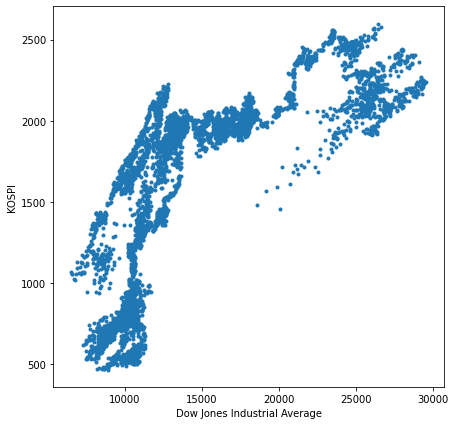

In [13]:
# 다우존스 지수와 KOSPI의 산점도 분석

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

yf.pdr_override()
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.') # 산점도를 작은 원(.) 모양으로 표시한다. 
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [15]:
# 선형 회귀 분석(linear regression model)
from scipy import stats

regr = stats.linregress(df['DOW'], df['KOSPI']) # linregress() 함수를 이용하면 시리즈 객체 두 개만으로 간단한 선형 회귀 모델을 생성하여 분석할 수 있다. 
print(regr)

LinregressResult(slope=0.0776158123384473, intercept=448.42529236630116, rvalue=0.7488842641584584, pvalue=0.0, stderr=0.000936140019081295)


In [16]:
# 상관계수 (Coefficient of Correlation) - A자산과 B자산의 상관계수가 1이면, A 자산 가치가 x%만큼 상승할 때 B자산 가치도 x%만큼 상승한다. -1이면 A자산 가치가 x% 만큼 상승할 때 B자산 가치는 x%만큼 하락한다. 상관계수가 0이면 두 자산의 움직임이 서로 전혀 연관성이 없다.
df.corr()

,DOW,KOSPI
DOW,1.000000,0.748884
KOSPI,0.748884,1.000000
